In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary  # Correct the import statement
from gensim.models.ldamodel import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Read data from CSV file
df = pd.read_csv('data.csv')

In [4]:
# Data cleaning and preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [5]:
# function for preprocessing the text dataset
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        words = word_tokenize(text.lower())
        words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
        return words
    else:
        return []  # Return an empty list for non-string values

In [6]:
df.dropna(subset=['Review'], inplace=True)  # Drop rows with missing values in 'Review' column
df['processed_text'] = df['Review'].apply(preprocess_text)

In [7]:
# Create Document-Term Matrix
dictionary = Dictionary(df['processed_text'])  # Use Dictionary method of corpora
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

In [8]:
# Topic Modeling (LDA)
num_topics = 10 # Adjust the number of topics as needed
lda_model = LdaModel(corpus, id2word=dictionary, passes=10)

In [10]:
# Print and Interpret Topics
print("Topics:")
for topic in lda_model.print_topics():
    print(topic)

Topics:
(36, '0.077*"son" + 0.059*"buggy" + 0.051*"uncommon" + 0.043*"kid" + 0.025*"usb" + 0.019*"port" + 0.018*"companion" + 0.017*"diego" + 0.014*"penny" + 0.013*"saw"')
(16, '0.059*"ba" + 0.044*"gatwick" + 0.041*"matter" + 0.040*"rome" + 0.038*"worse" + 0.034*"airway" + 0.031*"british" + 0.030*"become" + 0.030*"made" + 0.028*"lost"')
(3, '0.072*"lacklustre" + 0.062*"ratio" + 0.044*"relatively" + 0.036*"alone" + 0.020*"handled" + 0.020*"everything" + 0.013*"fixed" + 0.011*"passenger" + 0.011*"encountered" + 0.010*"fiasco"')
(81, '0.041*"u" + 0.036*"flight" + 0.030*"nice" + 0.029*"time" + 0.029*"first" + 0.024*"lounge" + 0.022*"cabin" + 0.018*"crew" + 0.018*"stroller" + 0.017*"chicago"')
(8, '0.073*"loyalty" + 0.069*"purser" + 0.063*"seatbelt" + 0.060*"lied" + 0.050*"access" + 0.032*"budapest" + 0.022*"cancelled" + 0.019*"highly" + 0.015*"orlando" + 0.013*"oneworld"')
(1, '0.135*"treatment" + 0.119*"pregnant" + 0.009*"behaved" + 0.006*"emotion" + 0.003*"regardless" + 0.003*"afterwards

In [11]:
# Topic Distribution in Documents
document_topics = [dict(lda_model[doc]) for doc in corpus]  # Process the output of LDA model
df['topics'] = document_topics

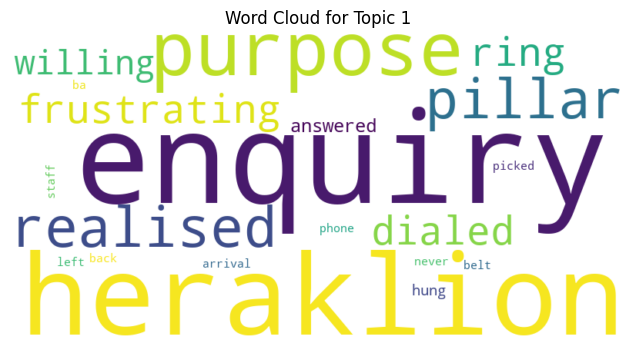

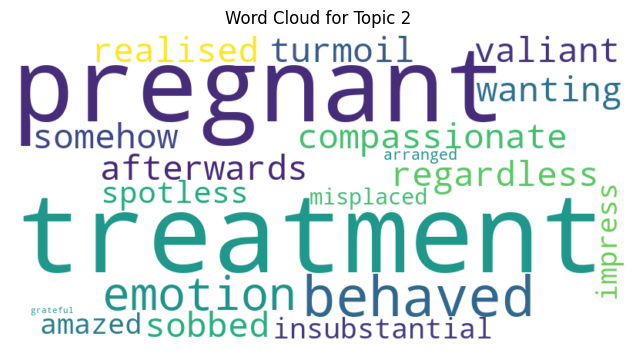

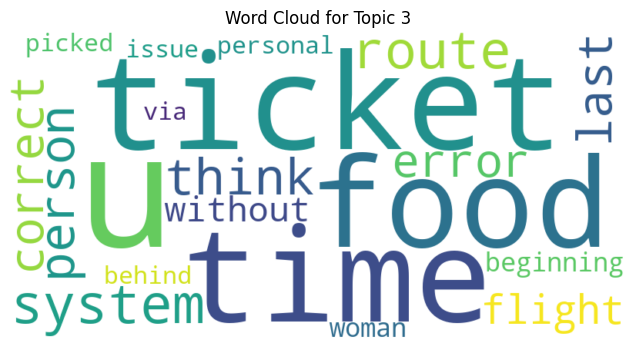

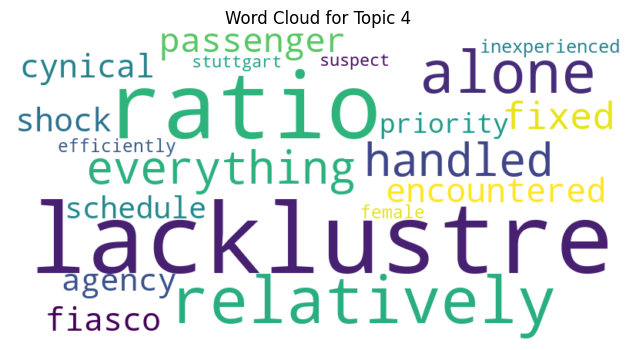

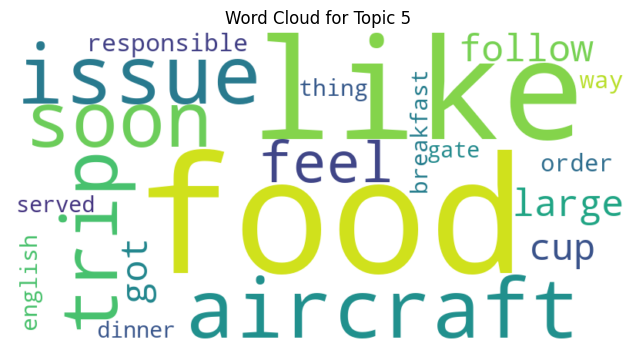

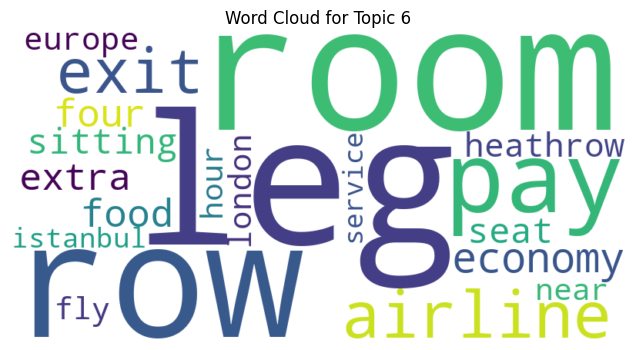

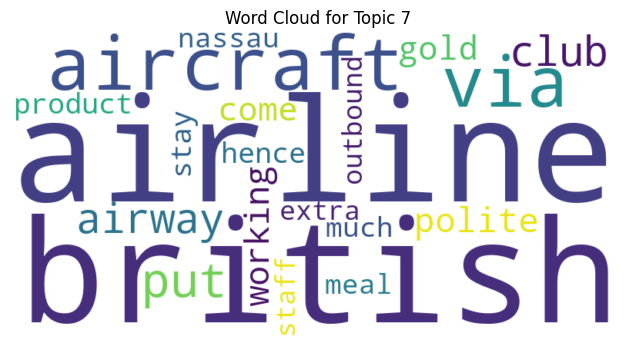

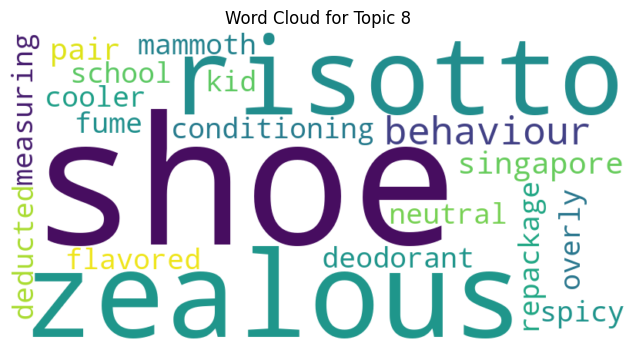

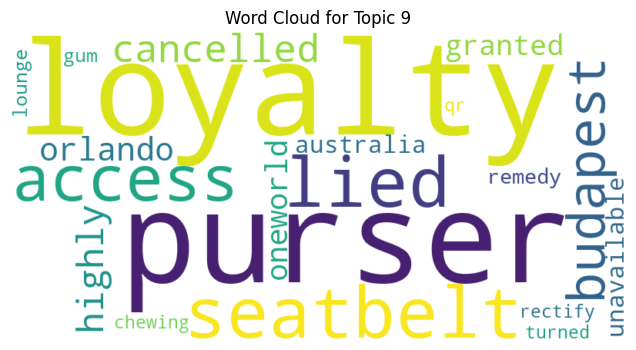

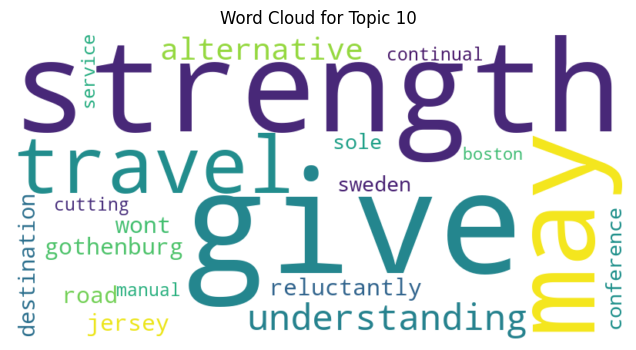

In [12]:
# Function to create a word cloud for each topic
def create_word_cloud(lda_model, dictionary):
    for topic_num in range(num_topics):
        words = lda_model.show_topic(topic_num, topn=20)  # Get top 20 words for each topic
        word_freq = {word: freq for word, freq in words}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for Topic {topic_num+1}")
        plt.show()

# Create and display word clouds for each topic
create_word_cloud(lda_model, dictionary)